<a href="https://colab.research.google.com/github/NidhiChaurasia/Fascinating-Python/blob/main/PyTorch%20Vs%20Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a comparison notebook for Tensorflow Vs Pytorch. It basically outlines the similarities and differences between Pytorch and Tensorflow.

Come on, let's create a simple SGD approximator for $f(x) = x^{exp}$, where $exp$ is a model parameter.

#Simple Pytorch

In [1]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1 MB 1.7 kB/s 
     |████████████████████████████████| 8.8 MB 50.8 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.2.0+cu92 which is incompatible.


In [2]:
import torch
from torch.autograd import Variable
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return torch.sqrt(torch.mean((y - y_hat).pow(2).sum()))

def forward(x, e):
    """Forward pass for our function"""
    return x.pow(e.repeat(x.size(0)))

# Let's define some settings
n = 100 # number of examples
learning_rate = 6e-8

# Model definition
x = Variable(torch.rand(n) * 10, requires_grad=False)

# Model parameter and it's true value
exp = Variable(torch.FloatTensor([2.0]), requires_grad=False)
exp_hat = Variable(torch.FloatTensor([4]), requires_grad=True)
y = forward(x, exp)

loss_history = []
exp_history = []

# Training loop
for i in range(0, 200):
    print("Iteration %d" % i)
    
    # Compute current estimate
    y_hat = forward(x, exp_hat)
    
    # Calculate loss function
    loss = rmse(y, y_hat)
    
    # Do some recordings for plots
    loss_history.append(loss.data)
    exp_history.append(y_hat.data[0])
    
    # Compute gradients
    loss.backward()
    
    print("loss = %s" % loss.data)
    print("exp = %s" % exp_hat.data[0])
    
    # Update model parameters
    exp_hat.data -= learning_rate * exp_hat.grad.data
    exp_hat.grad.data.zero_()

Iteration 0
loss = tensor(33625.0859)
exp = tensor(4.)
Iteration 1
loss = tensor(33289.1641)
exp = tensor(3.9955)
Iteration 2
loss = tensor(32959.8516)
exp = tensor(3.9910)
Iteration 3
loss = tensor(32636.9395)
exp = tensor(3.9866)
Iteration 4
loss = tensor(32320.2617)
exp = tensor(3.9823)
Iteration 5
loss = tensor(32009.6270)
exp = tensor(3.9779)
Iteration 6
loss = tensor(31704.8672)
exp = tensor(3.9736)
Iteration 7
loss = tensor(31405.8242)
exp = tensor(3.9694)
Iteration 8
loss = tensor(31112.3223)
exp = tensor(3.9652)
Iteration 9
loss = tensor(30824.2129)
exp = tensor(3.9610)
Iteration 10
loss = tensor(30541.3457)
exp = tensor(3.9569)
Iteration 11
loss = tensor(30263.5977)
exp = tensor(3.9528)
Iteration 12
loss = tensor(29990.8047)
exp = tensor(3.9488)
Iteration 13
loss = tensor(29722.8555)
exp = tensor(3.9447)
Iteration 14
loss = tensor(29459.6113)
exp = tensor(3.9408)
Iteration 15
loss = tensor(29200.9590)
exp = tensor(3.9368)
Iteration 16
loss = tensor(28946.7598)
exp = tensor(3.

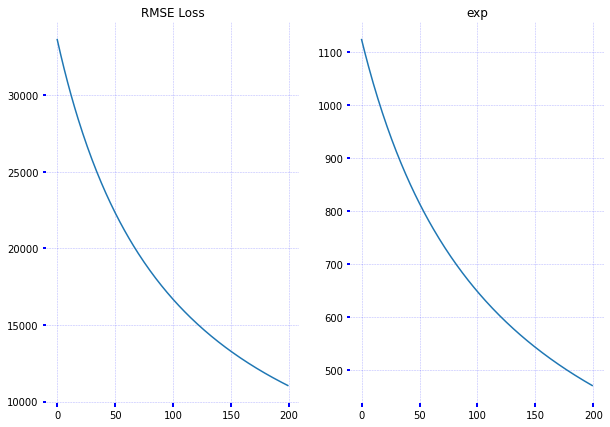

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_results(loss_history, exp_history):
    fig = plt.figure(figsize=(10, 7))
    fig.add_axes()

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    for ax in [ax1, ax2]:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.grid(color='b', linestyle='--', linewidth=0.5, alpha=0.3)
        ax.tick_params(direction='out', color='b', width='2')
        
    ax1.set_title('RMSE Loss')
    ax2.set_title('exp')
    ax1.plot(np.arange(len(loss_history)), loss_history)
    ax2.plot(np.arange(len(exp_history)), exp_history)
    
plot_results(loss_history, exp_history)

##Pytorch with optimizers

In [4]:
import torch
from torch.autograd import Variable
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return torch.sqrt(torch.mean((y - y_hat).pow(2)))

def forward(x, e):
    """Forward pass for our function"""
    return x.pow(e.repeat(x.size(0)))

# Let's define some settings
n = 1000 # number of examples
learning_rate = 6e-12

# Model definition
x = Variable(torch.rand(n) * 10, requires_grad=False)
y = forward(x, exp)

# Model parameters
exp = Variable(torch.FloatTensor([2.0]), requires_grad=False)
exp_hat = Variable(torch.FloatTensor([4]), requires_grad=True)

# Optimizer (NEW)
opt = torch.optim.SGD([exp_hat], lr=learning_rate, momentum=0.9)

loss_history = []
exp_history = []

# Training loop
for i in range(0, 10000):
    opt.zero_grad()
    print("Iteration %d" % i)
    
    # Compute current estimate
    y_hat = forward(x, exp_hat)
    
    # Calculate loss function
    loss = rmse(y, y_hat)
    
    # Do some recordings for plots
    loss_history.append(loss.data)
    exp_history.append(y_hat.data[0])
    
    # Update model parameters
    loss.backward()
    opt.step()
    
    print("loss = %s" % loss.data)
    print("exp = %s" % exp_hat.data[0])

Streaming output truncated to the last 5000 lines.
loss = tensor(3092.2563)
exp = tensor(3.9960)
Iteration 8334
loss = tensor(3092.2532)
exp = tensor(3.9960)
Iteration 8335
loss = tensor(3092.2498)
exp = tensor(3.9960)
Iteration 8336
loss = tensor(3092.2466)
exp = tensor(3.9960)
Iteration 8337
loss = tensor(3092.2434)
exp = tensor(3.9960)
Iteration 8338
loss = tensor(3092.2400)
exp = tensor(3.9960)
Iteration 8339
loss = tensor(3092.2368)
exp = tensor(3.9960)
Iteration 8340
loss = tensor(3092.2334)
exp = tensor(3.9960)
Iteration 8341
loss = tensor(3092.2300)
exp = tensor(3.9960)
Iteration 8342
loss = tensor(3092.2268)
exp = tensor(3.9960)
Iteration 8343
loss = tensor(3092.2236)
exp = tensor(3.9960)
Iteration 8344
loss = tensor(3092.2205)
exp = tensor(3.9960)
Iteration 8345
loss = tensor(3092.2173)
exp = tensor(3.9960)
Iteration 8346
loss = tensor(3092.2139)
exp = tensor(3.9960)
Iteration 8347
loss = tensor(3092.2104)
exp = tensor(3.9960)
Iteration 8348
loss = tensor(3092.2073)
exp = ten

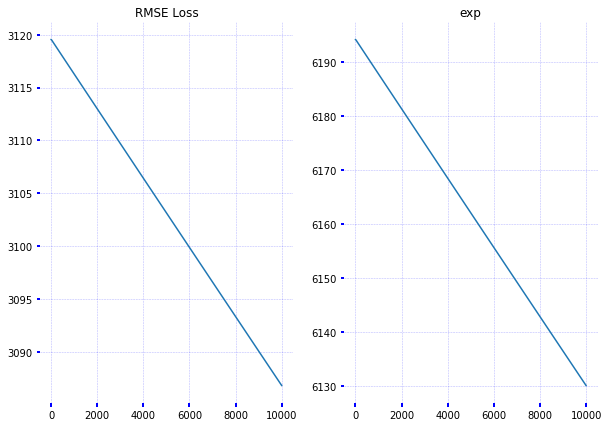

In [5]:
plot_results(loss_history, exp_history)

##Tensorflow

In [6]:
pip install tensorflow

In [7]:
import tensorflow.compat.v1 as tf  #Even after an upgrade to TensorFlow 2.0, we can still use 1.X API 
tf.disable_v2_behavior()
def rmse(y, y_hat):
    """Compute root mean squared error"""
    return tf.sqrt(tf.reduce_mean(tf.square((y - y_hat))))
def forward(x, e):
    """Forward pass for our function"""
    # tensorflow has automatic broadcasting 
    # so we do not need to reshape e manually
    return tf.pow(x, e) 
n = 100 # number of examples
learning_rate = 5e-6
# Placeholders for data
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
# Model parameters
exp = tf.constant(2.0)
exp_hat = tf.Variable(4.0, name='exp_hat')
# Model definition
y_hat = forward(x, exp_hat)
# Optimizer
loss = rmse(y, y_hat)
opt = tf.train.GradientDescentOptimizer(learning_rate)
# We will run this operation to perform a single training step,
# e.g. opt.step() in Pytorch.
# Execution of this operation will also update model parameters
train_op = opt.minimize(loss) 
# Let's generate some training data
x_train = np.random.rand(n) + 10
y_train = x_train ** 2
loss_history = []
exp_history = []
# First, we need to create a Tensorflow session object
with tf.Session() as sess:    
    # Initialize all defined variables
    tf.global_variables_initializer().run() 
    # Training loop
    for i in range(0, 500):
        print("Iteration %d" % i)
        # Run a single trainig step
        curr_loss, curr_exp, _ = sess.run([loss, exp_hat, train_op], feed_dict={x: x_train, y: y_train})    
        print("loss = %s" % curr_loss)
        print("exp = %s" % curr_exp)   
        # Do some recordings for plots
        loss_history.append(curr_loss)
        exp_history.append(curr_exp)

Instructions for updating:
non-resource variables are not supported in the long term
Iteration 0
loss = 12382.468
exp = 3.8524804
Iteration 1
loss = 8707.454
exp = 3.7483635
Iteration 2
loss = 6785.3926
exp = 3.6669445
Iteration 3
loss = 5579.2593
exp = 3.5997682
Iteration 4
loss = 4744.674
exp = 3.5424464
Iteration 5
loss = 4130.054
exp = 3.4923816
Iteration 6
loss = 3657.2576
exp = 3.447899
Iteration 7
loss = 3281.592
exp = 3.407852
Iteration 8
loss = 2975.536
exp = 3.371418
Iteration 9
loss = 2721.1484
exp = 3.3379874
Iteration 10
loss = 2506.2222
exp = 3.307094
Iteration 11
loss = 2322.138
exp = 3.278374
Iteration 12
loss = 2162.6365
exp = 3.2515368
Iteration 13
loss = 2023.0593
exp = 3.2263472
Iteration 14
loss = 1899.8551
exp = 3.2026122
Iteration 15
loss = 1790.2828
exp = 3.1801705
Iteration 16
loss = 1692.1783
exp = 3.158887
Iteration 17
loss = 1603.8187
exp = 3.1386461
Iteration 18
loss = 1523.8081
exp = 3.11935
Iteration 19
loss = 1451.0107
exp = 3.100913
Iteration 20
loss = 

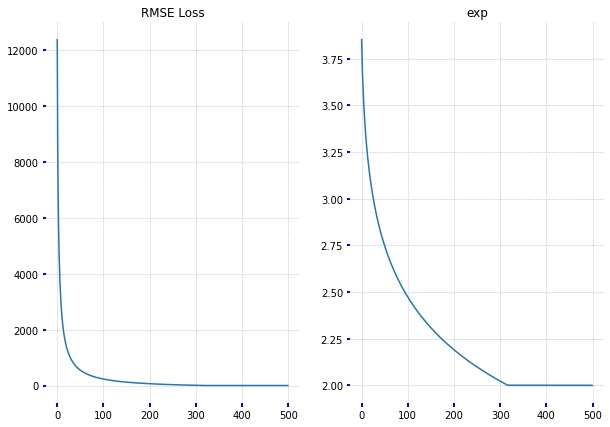

In [8]:
plot_results(loss_history, exp_history)

And now let's introduce the Tensorboard. This tool is very useful for debugging and comparison of different training runs. For example, you can train a model then tune some hyperparameters and train it again. 
Both runs can be displayed at Tensorboard simultaneously to indicate possible differences. Tensorboard can:

->Display model graph

->Plot sclarar variables

->Visualize disbtibutions and histograms

->Visualize images

->Visualize embeddings

->Play audio

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  #Even after an upgrade to TensorFlow 2.0, we can still use 1.X API 
import numpy as np

def rmse(y, y_hat):
    """Compute root mean squared error"""
    return tf.sqrt(tf.reduce_mean(tf.square((y - y_hat))))

def forward(x, e):
    """Forward pass for our function"""
    # tensorflow has automatic broadcasting 
    # so we do not need to reshape e manually
    return tf.pow(x, e) 

n = 100 # number of examples
learning_rate = 5e-6

# Placeholders for data
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Model parameters
exp = tf.constant(2.0)
exp_hat = tf.Variable(4.0, name='exp_hat')

# Model definition
y_hat = forward(x, exp_hat)

# Optimizer
loss = rmse(y, y_hat)
opt = tf.train.GradientDescentOptimizer(learning_rate)

# Summaries (NEW)
loss_summary = tf.summary.scalar("loss", loss)
exp_summary = tf.summary.scalar("exp", exp_hat)
all_summaries = tf.summary.merge_all()

# We will run this operation to perform a single training step,
# e.g. opt.step() in Pytorch.
# Execution of this operation will also update model parameters
train_op = opt.minimize(loss) 

# Let's generate some training data
x_train = np.random.rand(n) + 10
y_train = x_train ** 2

loss_history = []
exp_history = []

# First, we need to create a Tensorflow session object
with tf.Session() as sess:
    
    # Initialize all defined variables
    tf.global_variables_initializer().run()
    
    summary_writer = tf.summary.FileWriter('./tensorboard', sess.graph)
    
    # Training loop
    for i in range(0, 500):
        print("Iteration %d" % i)
        # Run a single trainig step
        summaries, curr_loss, curr_exp, _ = sess.run([all_summaries, loss, exp_hat, train_op], feed_dict={x: x_train, y: y_train})
        
        print("loss = %s" % curr_loss)
        print("exp = %s" % curr_exp)
        
        # Do some recordings for plots
        loss_history.append(curr_loss)
        exp_history.append(curr_exp)
        
        summary_writer.add_summary(summaries, i)

Iteration 0
loss = 12206.359
exp = 3.8547988
Iteration 1
loss = 8635.831
exp = 3.751699
Iteration 2
loss = 6748.616
exp = 3.6708503
Iteration 3
loss = 5558.371
exp = 3.6040344
Iteration 4
loss = 4732.277
exp = 3.5469575
Iteration 5
loss = 4122.659
exp = 3.4970672
Iteration 6
loss = 3653.0142
exp = 3.4527133
Iteration 7
loss = 3279.4307
exp = 3.4127629
Iteration 8
loss = 2974.7961
exp = 3.3764036
Iteration 9
loss = 2721.4116
exp = 3.343031
Iteration 10
loss = 2507.2012
exp = 3.3121831
Iteration 11
loss = 2323.6401
exp = 3.283499
Iteration 12
loss = 2164.5237
exp = 3.2566903
Iteration 13
loss = 2025.2299
exp = 3.2315233
Iteration 14
loss = 1902.2395
exp = 3.2078059
Iteration 15
loss = 1792.8231
exp = 3.185378
Iteration 16
loss = 1694.8352
exp = 3.1641052
Iteration 17
loss = 1606.5599
exp = 3.1438727
Iteration 18
loss = 1526.611
exp = 3.1245825
Iteration 19
loss = 1453.8541
exp = 3.1061497
Iteration 20
loss = 1387.3553
exp = 3.0885005
Iteration 21
loss = 1326.3353
exp = 3.0715704
Iteratio

##PyTorch modules

In [10]:
pip install torch

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# download and transform train dataset
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../mnist_data', 
                                                          download=True, 
                                                          train=True,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=10, 
                                           shuffle=True)

# download and transform test dataset
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../mnist_data', 
                                                          download=True, 
                                                          train=False,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=10, 
                                           shuffle=True)

class CNNClassifier(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    
    def forward(self, x):
        # input is 28x28x1
        # conv1(kernel=5, filters=10) 28x28x10 -> 24x24x10
        # max_pool(kernel=2) 24x24x10 -> 12x12x10
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        
        # conv2(kernel=5, filters=20) 12x12x20 -> 8x8x20
        # max_pool(kernel=2) 8x8x20 -> 4x4x20
        x = F.relu(F.max_pool2d(self.dropout(self.conv2(x)), 2))
        
        # flatten 4x4x20 = 320
        x = x.view(-1, 320)
        
        # 320 -> 50
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        
        # 50 -> 10
        x = self.fc2(x)
        
        # transform to logits
        return F.log_softmax(x)

9920512it [00:00, 44199138.07it/s]                             


Extracting ../mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ../mnist_data/MNIST/raw


32768it [00:00, 504818.86it/s]


Extracting ../mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ../mnist_data/MNIST/raw


1654784it [00:00, 15029953.40it/s]                             

Extracting ../mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../mnist_data/MNIST/raw


8192it [00:00, 175210.92it/s]


Extracting ../mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../mnist_data/MNIST/raw
Processing...
Done!


In [ ]:
F.max_pool2d(out ,2)